# Линейные модели, SVM и деревья решений.

## Подготовка

Загрузка датасета

In [12]:
import pandas as pd
df = pd.read_csv('GM_players_statistics.csv')

In [13]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

Заполнение пропусков

In [14]:
from sklearn.impute import SimpleImputer

num_cols = []

for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count == 0:
        continue

    imp_strategy=''
    if dt=='float64' or dt=='int64':
        num_cols.append(col)
        imp_strategy = 'mean'
    else:
        imp_strategy = 'most_frequent'

    imp_num = SimpleImputer(strategy=imp_strategy)
    data_num_imp = imp_num.fit_transform(df[[col]])
    df[[col]] = data_num_imp

Матрица корреляций

<Axes: >

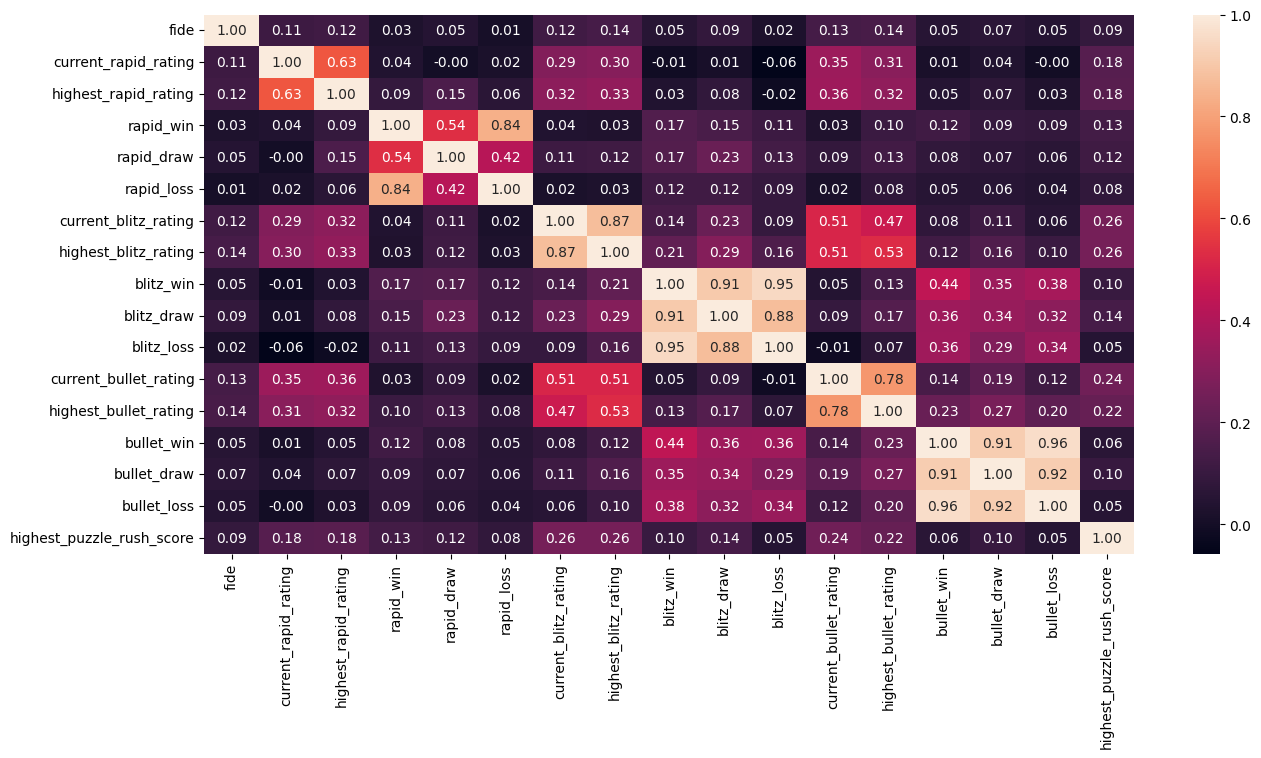

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Кодирование категориального признака `league`

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_enc_le = le.fit_transform(df['league'])
df['league_coded'] = cat_enc_le

## Разделение выборки на обучающую и тестовую

In [24]:
from sklearn.model_selection import train_test_split

x_df = df[num_cols].drop(columns='highest_rapid_rating') # числовые колонки

y_df = df['highest_rapid_rating'] # колонка с самым высоким рейтингом по рапиду

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=42)

## Обучение линейной регрессии

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_regr = LinearRegression().fit(np.array(x_df), np.array(y_df).reshape(-1, 1))
linear_regr.coef_

array([[ 5.32391009e-03,  4.35533557e-01, -5.37725583e-02,
         8.05563438e-01, -7.82744521e-03,  9.88705228e-03,
         6.58215495e-02,  4.73276651e-03,  4.41942112e-02,
        -1.68872341e-02,  6.10123936e-02,  1.53942401e-02,
        -6.11222329e-04, -4.68131090e-02,  7.08230438e-03,
         1.59102552e-01]])